In [1]:
from mlx_vlm import apply_chat_template, generate, load
from mlx_vlm.utils import load_image

In [2]:
model_path = "mlx-community/Nanonets-OCR-s-bf16"
model, processor = load(model_path)
config = model.config

/Users/ljoana/.pyenv/versions/ml/lib/python3.11/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


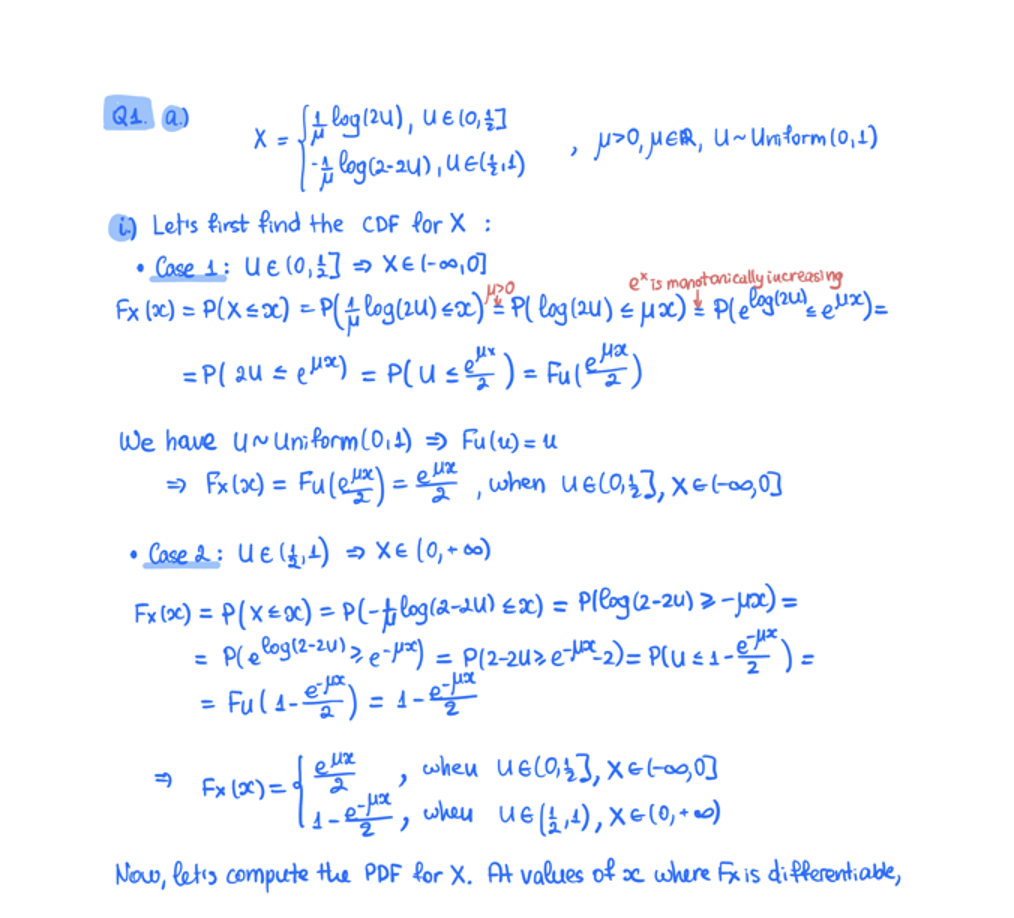

In [3]:
image_path = "../images/sc_1.png"
image = load_image(image_path)
image

In [4]:
image.size

(1014, 918)

In [5]:
prompt = """Extract the text from the above document as if you were reading it naturally. Return the tables in html format. Return the equations in LaTeX representation. If there is an image in the document and image caption is not present, add a small description of the image inside the <img></img> tag; otherwise, add the image caption inside <img></img>. Watermarks should be wrapped in brackets. Ex: <watermark>OFFICIAL COPY</watermark>. Page numbers should be wrapped in brackets. Ex: <page_number>14</page_number> or <page_number>9/22</page_number>. Prefer using ☐ and ☑ for check boxes."""

In [6]:
# prompt = """Extract the text from the above document as if you were reading it naturally. Return the tables in html format. Return the equations in LaTeX representation. If there is an image in the document and image caption is not present, add a small description of the image inside the <img></img> tag; otherwise, add the image caption inside <img></img>. Watermarks should be wrapped in brackets. Ex: <watermark>OFFICIAL COPY</watermark>. Page numbers should be wrapped in brackets. Ex: <page_number>14</page_number> or <page_number>9/22</page_number>. Prefer using ☐ and ☑ for check boxes."""

In [7]:
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": [
        {"type": "image", "image": f"file://{image_path}"},
        {"type": "text", "text": prompt},
    ]},
]

In [8]:
formatted_prompt = apply_chat_template(
    processor, config, messages
)

In [9]:
generate(model, processor, formatted_prompt, image, verbose=True, max_tokens=2000)

Files: <PIL.Image.Image image mode=RGB size=1014x918 at 0x106700A10> 

Prompt: <|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
<|vision_start|><|image_pad|><|vision_end|>[{'type': 'image', 'image': 'file://../images/sc_1.png'}, {'type': 'text', 'text': 'Extract the text from the above document as if you were reading it naturally. Return the tables in html format. Return the equations in LaTeX representation. If there is an image in the document and image caption is not present, add a small description of the image inside the <img></img> tag; otherwise, add the image caption inside <img></img>. Watermarks should be wrapped in brackets. Ex: <watermark>OFFICIAL COPY</watermark>. Page numbers should be wrapped in brackets. Ex: <page_number>14</page_number> or <page_number>9/22</page_number>. Prefer using ☐ and ☑ for check boxes.'}]<|im_end|>
<|im_start|>assistant

Q1. a)

$$X = \begin{cases} \frac{1}{\mu} \log(2u), & u \in (0, \frac{1}{2}] \\ -\frac{1}{\mu} \log(

("Q1. a)\n\n$$X = \\begin{cases} \\frac{1}{\\mu} \\log(2u), & u \\in (0, \\frac{1}{2}] \\\\ -\\frac{1}{\\mu} \\log(2-2u), & u \\in (\\frac{1}{2}, 1) \\end{cases}, \\mu > 0, \\mu \\in \\mathbb{R}, u \\sim \\text{Uniform}(0,1)$$\n\ni) Let's first find the CDF for $X$:\n\n- **Case 1:** $u \\in (0, \\frac{1}{2}] \\Rightarrow X \\in (-\\infty, 0]$\n\n$$F_X(x) = P(X \\leq x) = P\\left(\\frac{1}{\\mu} \\log(2u) \\leq x\\right) = P\\left(\\log(2u) \\leq \\mu x\\right) = P\\left(e^{\\log(2u)} \\leq e^{\\mu x}\\right) =$$\n\n$$= P(2u \\leq e^{\\mu x}) = P(u \\leq \\frac{e^{\\mu x}}{2}) = F_U\\left(\\frac{e^{\\mu x}}{2}\\right)$$\n\nWe have $u \\sim \\text{Uniform}(0,1) \\Rightarrow F_U(u) = u$\n\n$$\\Rightarrow F_X(x) = F_U\\left(\\frac{e^{\\mu x}}{2}\\right) = \\frac{e^{\\mu x}}{2}, \\text{ when } u \\in (0, \\frac{1}{2}], x \\in (-\\infty, 0]$$\n\n- **Case 2:** $u \\in (\\frac{1}{2}, 1) \\Rightarrow X \\in (0, +\\infty)$\n\n$$F_X(x) = P(X \\leq x) = P(-\\frac{1}{\\mu} \\log(2-2u) \\leq x) = P(

# Output

Q1. a)

$$X = \begin{cases} \frac{1}{\mu} \log(2u), & u \in (0, \frac{1}{2}] \\ -\frac{1}{\mu} \log(2-2u), & u \in (\frac{1}{2}, 1) \end{cases}, \mu > 0, \mu \in \mathbb{R}, u \sim \text{Uniform}(0,1)$$

i) Let's first find the CDF for $X$:

- **Case 1:** $u \in (0, \frac{1}{2}] \Rightarrow X \in (-\infty, 0]$

$$F_X(x) = P(X \leq x) = P\left(\frac{1}{\mu} \log(2u) \leq x\right) = P\left(\log(2u) \leq \mu x\right) = P\left(e^{\log(2u)} \leq e^{\mu x}\right) =$$

$$= P(2u \leq e^{\mu x}) = P(u \leq \frac{e^{\mu x}}{2}) = F_U\left(\frac{e^{\mu x}}{2}\right)$$

We have $u \sim \text{Uniform}(0,1) \Rightarrow F_U(u) = u$

$$\Rightarrow F_X(x) = F_U\left(\frac{e^{\mu x}}{2}\right) = \frac{e^{\mu x}}{2}, \text{ when } u \in (0, \frac{1}{2}], x \in (-\infty, 0]$$

- **Case 2:** $u \in (\frac{1}{2}, 1) \Rightarrow X \in (0, +\infty)$

$$F_X(x) = P(X \leq x) = P(-\frac{1}{\mu} \log(2-2u) \leq x) = P(\log(2-2u) \geq -\mu x) =$$

$$= P(e^{\log(2-2u)} \geq e^{-\mu x}) = P(2-2u \geq e^{-\mu x}) = P(u \leq 1 - \frac{e^{-\mu x}}{2}) =$$

$$= F_U(1 - \frac{e^{-\mu x}}{2}) = 1 - \frac{e^{-\mu x}}{2}$$

$$\Rightarrow F_X(x) = \begin{cases} \frac{e^{\mu x}}{2}, & \text{when } u \in (0, \frac{1}{2}], x \in (-\infty, 0] \\ 1 - \frac{e^{-\mu x}}{2}, & \text{when } u \in (\frac{1}{2}, 1), x \in (0, +\infty) \end{cases}$$

Now, let's compute the PDF for $X$. At values of $x$ where $F_X$ is differentiable,